In [1]:
# env-base(installed at base)
import scanpy as sc
import torch
import scarches as sca
print(sca.__version__)
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import numpy as np
import gdown
from anndata import AnnData
import numpy as np
import pandas as pd
import os
sc.settings.seed = 42
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

/home/lanxiang/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 captum (see https://github.com/pytorch/captum).


0.6.1


In [2]:
##load dataset
adata = sc.read_h5ad('/data2/lanxiang/embryo_benchmark/25.1.13_update/human_reanno_20250108.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 33406 × 60421
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'doublet', 'doublet_score', 'Unintegrated_res_0.5', 'Scanorama_res_0.5', 'LIGER_res_0.5', 'Harmony_res_0.5', 'scVI_res_0.5', 'scANVI_res_0.5', 'CCA_res_0.5', 'FastMNN_res_0.5', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'reanno', 'lineage', 'unicorns', 'combined_annotation', 'final_anno', 'final_lineage'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CCA_res_0.5_colors', 'FastMNN_res_0.5_colors', 'Harmony_res_0.5_colors', 'LIGER_res_0.5_colors', 'Scanorama_res_0.5_colors', 'Unintegrated_res_0.5_colors', 'anno_colors', 'dendrogram_lineage', 'dendrogram_reanno', 'final_anno_colors', 'final_lineage_colors', 'harmo.anno_colors', 'hvg', 'leiden', 'leiden_3_col

In [4]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1       mole    112028.0          9381   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1       mole    191885.0          8618   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1       mole    189565.0          7942   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1       mole     25545.0          4869   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1       mole    107601.0         10074   
...                                   ...         ...           ...   
GAATCTGA                             zhou      7297.0          2026   
GCCAAGAC                             zhou      7962.0          2019   
GTCGTAGA                             zhou      9702.0          2740   
TATCAGCA                             zhou     10857.0          2771   
TGAAGAGA                             zhou      8210.0          2232   

                                            sample   stage  percent.mt  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1             Sample1  E9_IVC    5.228157   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1             Sample1  E9_IVC   14.688485   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1             Sample1  E9_IVC    7.517738   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1             Sample1  E9_IVC   17.987865   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1             Sample1  E9_IVC    3.851265   
...                                            ...     ...         ...   
GAATCTGA                        tri-vol-d8-181015T  E8_IVC   12.210497   
GCCAAGAC                        tri-vol-d8-181015T  E8_IVC    0.879176   
GTCGTAGA                        tri-vol-d8-181015T  E8_IVC    4.648526   
TATCAGCA                        tri-vol-d8-181015T  E8_IVC    3.232937   
TGAAGAGA                        tri-vol-d8-181015T  E8_IVC    2.971985   

                                     species                   embryo  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1  Homo sapiens     Real Embryo in vitro   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1  Homo sapiens     Real Embryo in vitro   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1  Homo sapiens     Real Embryo in vitro   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1  Homo sapiens     Real Embryo in vitro   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1  Homo sapiens     Real Embryo in vitro   
...                                      ...                      ...   
GAATCTGA                        Homo sapiens  Tri_hv_D8_IVC2_E7_B3_46   
GCCAAGAC                        Homo sapiens  Tri_hv_D8_IVC2_E7_B3_96   
GTCGTAGA                        Homo sapiens  Tri_hv_D8_IVC2_E7_B3_57   
TATCAGCA                        Homo sapiens  Tri_hv_D8_IVC2_E7_B3_61   
TGAAGAGA                        Homo sapiens  Tri_hv_D8_IVC2_E7_B3_64   

                                    platform ann_level_2  ... leiden_1  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1  10x-Genomics  TE_CTB_STB  ...        1   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1  10x-Genomics  TE_CTB_STB  ...        1   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1  10x-Genomics  TE_CTB_STB  ...        1   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1  10x-Genomics  TE_CTB_STB  ...        1   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1  10x-Genomics   Hypoblast  ...        0   
...                                      ...         ...  ...      ...   
GAATCTGA                            STRT-Seq          TE  ...        1   
GCCAAGAC                            STRT-Seq          TE  ...        1   
GTCGTAGA                            STRT-Seq          PE  ...        1   
TATCAGCA                            STRT-Seq          TE  ...        1   
TGAAGAGA                            STRT-Seq          TE  ...        1   

                               leiden_2  leiden_3  leiden_4  reanno   lineage  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1      1.2     1.2.2       nan    CTBs    TE_TrB   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1      1.1     1.1.0       nan  STBs_3    TE_TrB   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1      1.2     1.2.0       nan  STBs_1    TE_TrB   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1      1.2     1.2.0       nan  STBs_1    TE_TrB   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1      0.6     0.6.2       nan     AVE  ExE_endo   
...                                 .

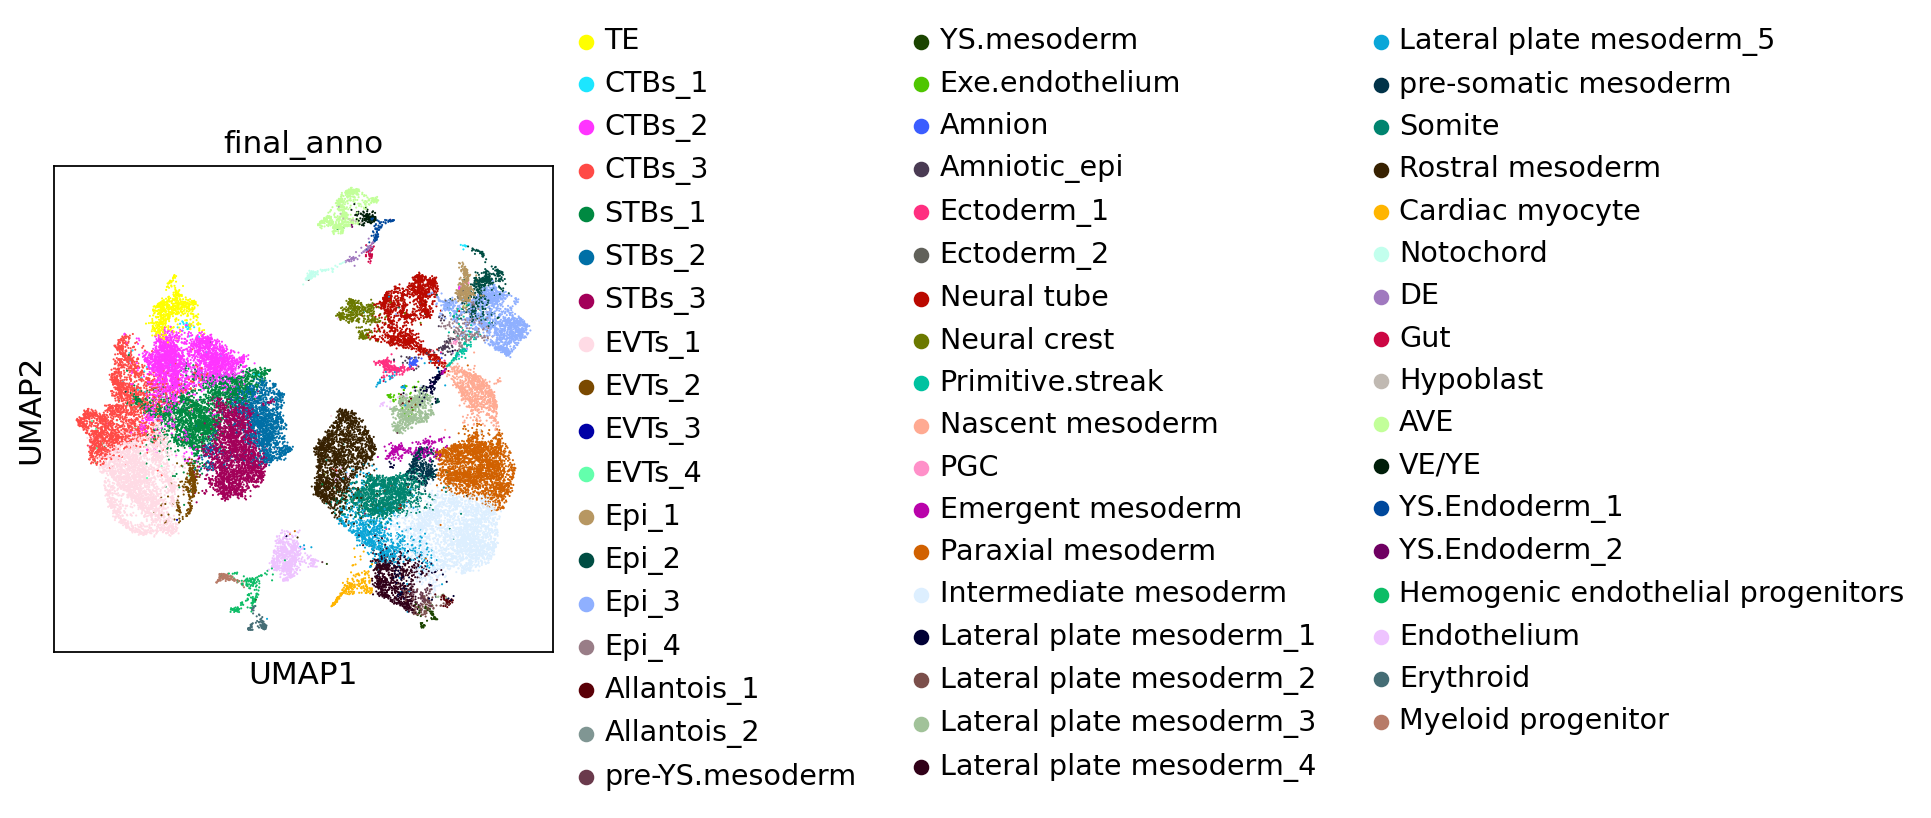

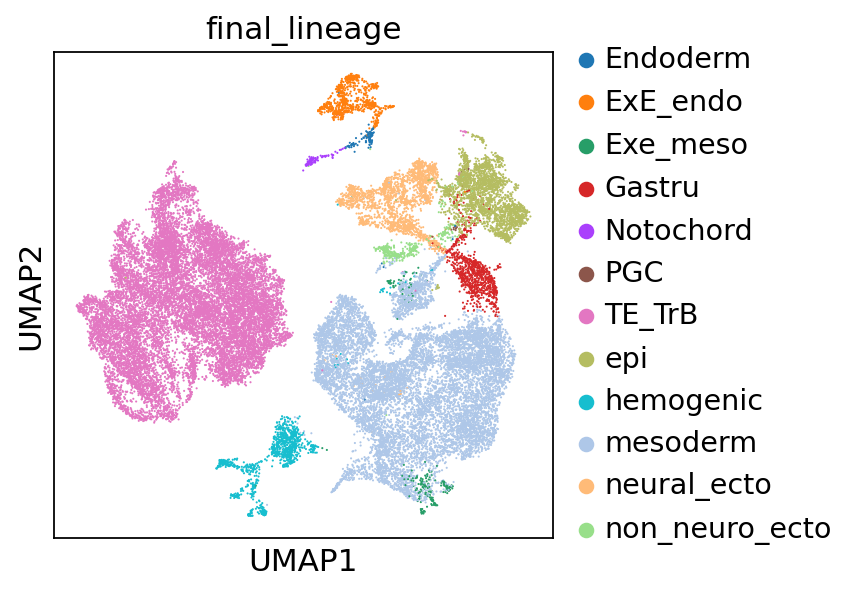

In [5]:
sc.pl.umap(adata, color=['final_anno'])
sc.pl.umap(adata, color=['final_lineage'])

In [6]:
adata_hvg = adata[:, adata.var.highly_variable].copy()

In [7]:
adata_hvg

AnnData object with n_obs × n_vars = 33406 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'doublet', 'doublet_score', 'Unintegrated_res_0.5', 'Scanorama_res_0.5', 'LIGER_res_0.5', 'Harmony_res_0.5', 'scVI_res_0.5', 'scANVI_res_0.5', 'CCA_res_0.5', 'FastMNN_res_0.5', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'reanno', 'lineage', 'unicorns', 'combined_annotation', 'final_anno', 'final_lineage'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CCA_res_0.5_colors', 'FastMNN_res_0.5_colors', 'Harmony_res_0.5_colors', 'LIGER_res_0.5_colors', 'Scanorama_res_0.5_colors', 'Unintegrated_res_0.5_colors', 'anno_colors', 'dendrogram_lineage', 'dendrogram_reanno', 'final_anno_colors', 'final_lineage_colors', 'harmo.anno_colors', 'hvg', 'leiden', 'leiden_3_colo

In [8]:
import anndata

print("Original obs:", adata_hvg.obs.columns)
print("Original var:", adata_hvg.var.columns)
print("Original uns:", adata_hvg.uns.keys())
print("Original obsm:", adata_hvg.obsm.keys())
print("Original varm:", adata_hvg.varm.keys())
print("Original layers:", adata_hvg.layers.keys())

obs_to_keep = ['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'final_anno', 'final_lineage']
obs_columns_to_remove = [col for col in adata_hvg.obs.columns if col not in obs_to_keep]
adata_hvg.obs.drop(columns=obs_columns_to_remove, inplace=True)

features_to_keep = ['features']
var_columns_to_remove = [col for col in adata_hvg.var.columns if col not in features_to_keep]
adata_hvg.var.drop(columns=var_columns_to_remove, inplace=True)

adata_hvg.uns = {}

adata_hvg.obsm = {}

adata_hvg.varm = {}

layers_to_keep = ['counts']
layers_keys_to_remove = [key for key in adata_hvg.layers.keys() if key not in layers_to_keep]
for key in layers_keys_to_remove:
    del adata_hvg.layers[key]

print("Modified obs:", adata_hvg.obs.columns)
print("Modified var:", adata_hvg.var.columns)
print("Modified uns:", adata_hvg.uns.keys())
print("Modified obsm:", adata_hvg.obsm.keys())
print("Modified varm:", adata_hvg.varm.keys())
print("Modified layers:", adata_hvg.layers.keys())

Original obs: Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage',
       'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2',
       'ann_level_3', 'ann_level_1', 'doublet', 'doublet_score',
       'Unintegrated_res_0.5', 'Scanorama_res_0.5', 'LIGER_res_0.5',
       'Harmony_res_0.5', 'scVI_res_0.5', 'scANVI_res_0.5', 'CCA_res_0.5',
       'FastMNN_res_0.5', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4',
       'reanno', 'lineage', 'unicorns', 'combined_annotation', 'final_anno',
       'final_lineage'],
      dtype='object')
Original var: Index(['features', 'n_cells', 'highly_variable', 'means', 'dispersions',
       'dispersions_norm', 'highly_variable_nbatches',
       'highly_variable_intersection'],
      dtype='object')
Original uns: dict_keys(['CCA_res_0.5_colors', 'FastMNN_res_0.5_colors', 'Harmony_res_0.5_colors', 'LIGER_res_0.5_colors', 'Scanorama_res_0.5_colors', 'Unintegrated_res_0.5_colors', 'anno_colors', 'dendrogram_lineage', 'dendrogram_reann

In [9]:
counts_matrix = adata_hvg.layers["counts"].toarray()
adata = sc.AnnData(X=counts_matrix, obs=adata_hvg.obs.copy(), var=adata_hvg.var.copy(),uns=adata_hvg.uns.copy(), obsm = adata_hvg.obsm.copy(),varm = adata_hvg.varm.copy(),layers={'counts': counts_matrix})

In [10]:
adata

AnnData object with n_obs × n_vars = 33406 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'final_anno', 'final_lineage'
    var: 'features'
    layers: 'counts'

In [11]:
adata = remove_sparsity(adata)

In [12]:
source_adata = adata.copy()

In [13]:
Weatherbee = sc.read_h5ad('/data2/lanxiang/embryo_benchmark/9.27labeltransfer_data/corrected_processed_Weatherbee.h5ad')
Weatherbee

AnnData object with n_obs × n_vars = 5901 × 31531
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform', 'doublet', 'doublet_score'
    var: 'features', 'n_cells'

In [14]:
sc.settings.seed = 42
Weatherbee.layers["counts"] =Weatherbee.X.copy()
sc.pp.normalize_total(Weatherbee, target_sum=1e4)
sc.pp.log1p(Weatherbee)
Weatherbee.layers["logcounts"] = Weatherbee.X.copy()
sc.pp.highly_variable_genes(Weatherbee, n_top_genes=2000, flavor="cell_ranger", batch_key="orig.ident")
sc.tl.pca(Weatherbee, n_comps=30, use_highly_variable=True)

/home/lanxiang/miniconda3/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [15]:
Weatherbee

AnnData object with n_obs × n_vars = 5901 × 31531
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform', 'doublet', 'doublet_score'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'

In [16]:
counts_matrix = Weatherbee.layers["counts"].toarray()
adata3 = sc.AnnData(X=counts_matrix, obs=Weatherbee.obs.copy(), var=Weatherbee.var.copy(), layers={'counts': counts_matrix})

In [17]:
adata3 = remove_sparsity(adata3)

In [18]:
adata3

AnnData object with n_obs × n_vars = 5901 × 31531
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform', 'doublet', 'doublet_score'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    layers: 'counts'

In [19]:
all_genes = source_adata.var_names
missing_genes = all_genes.difference(adata3.var_names)
missing_data = np.zeros((adata3.shape[0], len(missing_genes)))
adata3_df = pd.DataFrame(adata3.X, columns=adata3.var_names, index=adata3.obs_names)
missing_df = pd.DataFrame(missing_data, columns=missing_genes, index=adata3.obs_names)
adata3_combined_df = pd.concat([adata3_df, missing_df], axis=1)
adata3_combined_df = adata3_combined_df[all_genes]
adata3_extended = sc.AnnData(
    X=adata3_combined_df.values, 
    obs=adata3.obs,
    var=pd.DataFrame(index=all_genes),
    layers={'counts': adata3_combined_df.values})
adata3_extended.var['features'] = Weatherbee.var.reindex(all_genes)['features']


In [20]:
adata3_extended

AnnData object with n_obs × n_vars = 5901 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform', 'doublet', 'doublet_score'
    var: 'features'
    layers: 'counts'

In [21]:
obs_to_keep = ['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform']
obs_columns_to_remove = [col for col in adata3_extended.obs.columns if col not in obs_to_keep]
adata3_extended.obs.drop(columns=obs_columns_to_remove, inplace=True)

In [22]:
print(adata3_extended.obs.dtypes)

orig.ident                category
nCount_RNA                 float64
nFeature_RNA                 int32
percent.mt                 float64
sample_type               category
scmap_nakamura            category
scmapCELL_Yang            category
scmap_ma                  category
scmap_Tyser               category
scmapCELL_Mole            category
cell_assignment           category
course_cell_assignment    category
stage                     category
species                   category
embryo                    category
platform                  category
dtype: object


In [23]:
print(source_adata.obs.dtypes)

orig.ident       category
nCount_RNA        float64
nFeature_RNA        int32
sample           category
stage            category
percent.mt        float64
species          category
embryo           category
platform         category
ann_level_2      category
ann_level_3      category
ann_level_1      category
final_anno       category
final_lineage    category
dtype: object


In [24]:
target_adata = adata3_extended.copy()

In [25]:
original_source_adata=source_adata.copy()
original_target_adata = target_adata.copy()

# final_anno

In [26]:
condition_key = 'orig.ident'
cell_type_key = "final_anno"

In [27]:
sca.models.SCVI.setup_anndata(source_adata, batch_key=condition_key, labels_key=cell_type_key)
vae = sca.models.SCVI(
    source_adata,
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)
vae.train()

/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 9 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU

Epoch 239/239: 100%|██████████| 239/239 [14:08<00:00,  3.48s/it, v_num=1, train_loss_step=1.1e+3, train_loss_epoch=1.19e+3] 

INFO: `Trainer.fit` stopped: `max_epochs=239` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=239` reached.


Epoch 239/239: 100%|██████████| 239/239 [14:08<00:00,  3.55s/it, v_num=1, train_loss_step=1.1e+3, train_loss_epoch=1.19e+3]


In [28]:
scanvae = sca.models.SCANVI.from_scvi_model(vae, unlabeled_category = "Unknown")
print("Labelled Indices: ", len(scanvae._labeled_indices))
print("Unlabelled Indices: ", len(scanvae._unlabeled_indices))

/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 9 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_scanvi.py:56: UserWarning: Category 9 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  mapping = _make_column_categorical(


Labelled Indices:  33406
Unlabelled Indices:  0


In [29]:
scanvae.train(max_epochs=20)
reference_latent = sc.AnnData(scanvae.get_latent_representation())
reference_latent.obs["cell_type"] = source_adata.obs[cell_type_key].tolist()
reference_latent.obs["batch"] = source_adata.obs[condition_key].tolist()

INFO     Training for 20 epochs.                                                                                   


INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_

Epoch 20/20: 100%|██████████| 20/20 [03:09<00:00,  9.47s/it, v_num=1, train_loss_step=1.24e+3, train_loss_epoch=1.19e+3]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [03:09<00:00,  9.48s/it, v_num=1, train_loss_step=1.24e+3, train_loss_epoch=1.19e+3]


/tmp/ipykernel_4077059/2662305162.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(reference_latent)


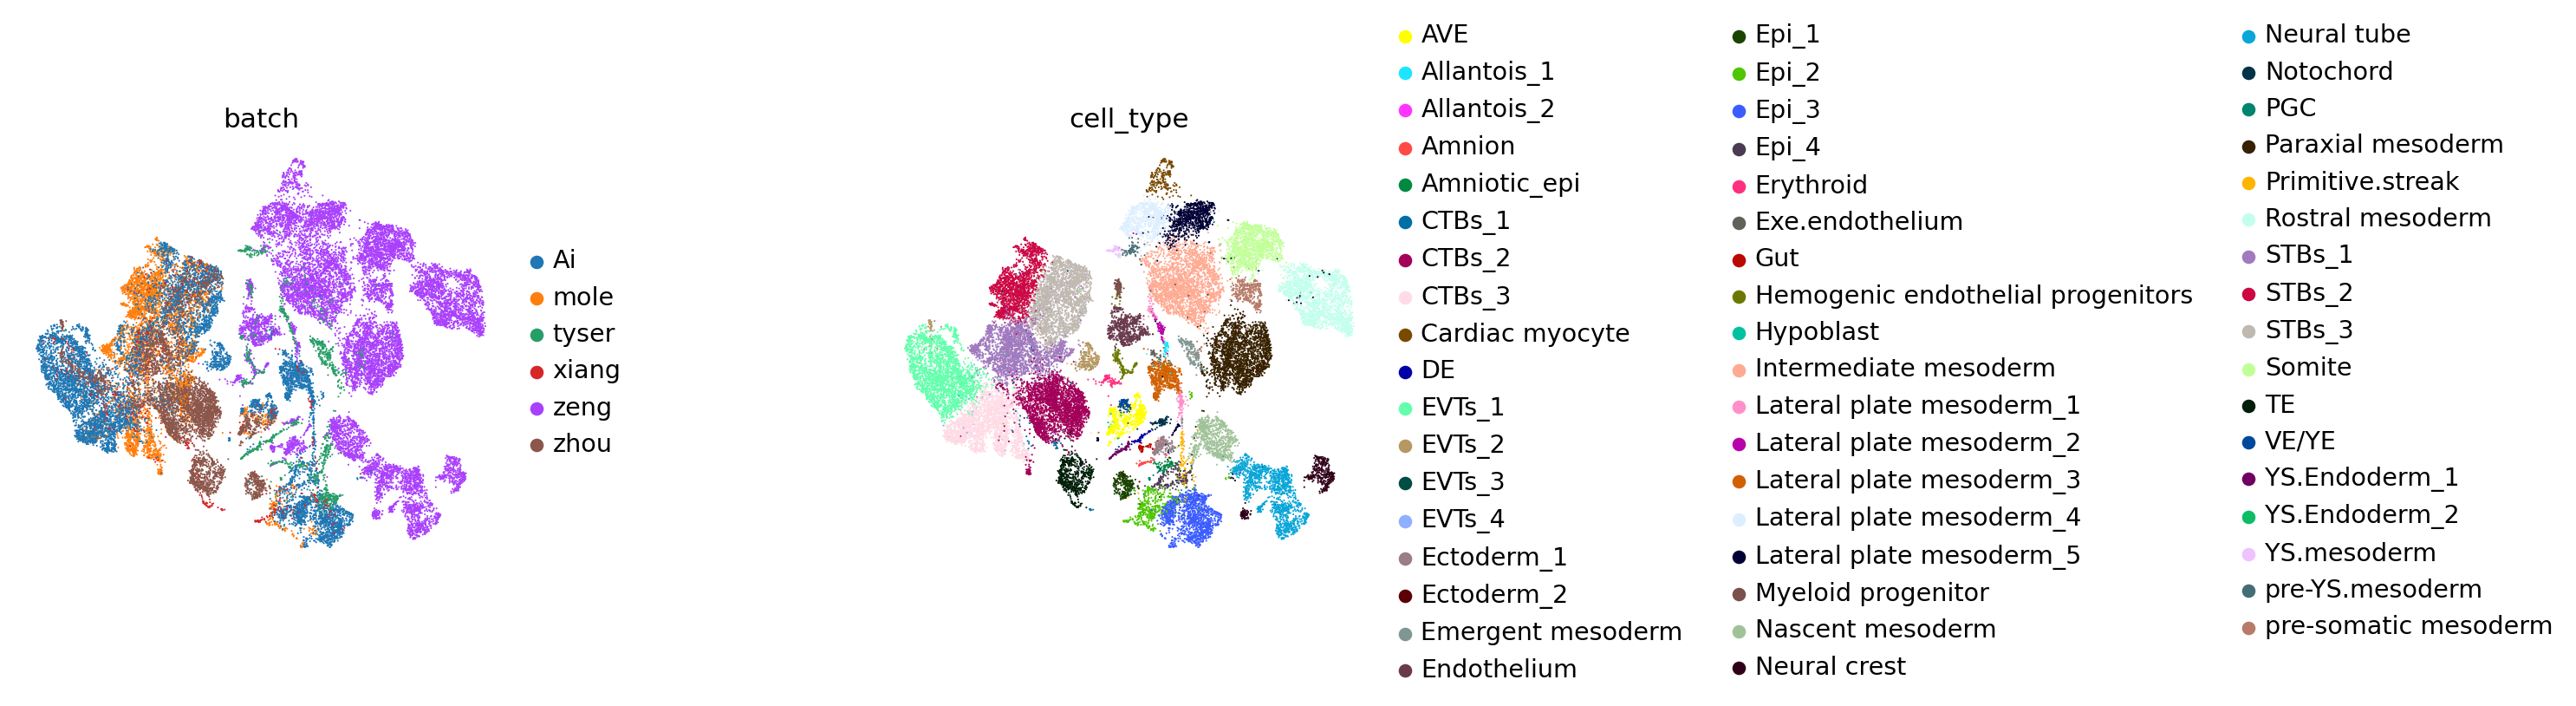

In [30]:
sc.pp.neighbors(reference_latent, n_neighbors=10)
sc.tl.leiden(reference_latent)
sc.tl.umap(reference_latent)
sc.pl.umap(reference_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,)

In [31]:
reference_latent.obs['predictions'] = scanvae.predict()
reference_latent.obs

cell_type batch leiden predictions
0        CTBs_3  mole     27      CTBs_3
1        STBs_3  mole      4      STBs_3
2        STBs_1  mole      9      STBs_1
3        STBs_1  mole      9      STBs_1
4           AVE  mole     20         AVE
...         ...   ...    ...         ...
33401    STBs_1  zhou      9      STBs_1
33402    CTBs_2  zhou      8      CTBs_2
33403    CTBs_2  zhou      8      CTBs_2
33404    CTBs_2  zhou      8      CTBs_2
33405    CTBs_2  zhou      8      CTBs_2

[33406 rows x 4 columns]

In [32]:
ref_path = '/data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_anno_model'
scanvae.save(ref_path, overwrite=True)

In [33]:
target_adata

AnnData object with n_obs × n_vars = 5901 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform'
    var: 'features'
    layers: 'counts'

In [34]:
target_adata.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
AAACAGCCAATATACC-1_1  Weatherbee      7994.0          3257    4.953715   
AAACAGCCACTAAGCC-1_1  Weatherbee      8411.0          3593    4.541672   
AAACATGCAGTATGTT-1_1  Weatherbee      7937.0          3497    3.187602   
AAACCAACAATAACCT-1_1  Weatherbee     10750.0          4132    2.483721   
AAACCGAAGGCTAGAA-1_1  Weatherbee     10730.0          4098    3.122088   
...                          ...         ...           ...         ...   
TTTGAGTCATCCGTAA-1    Weatherbee     29746.0          6569   10.925839   
TTTGGTAAGTTACTTC-1    Weatherbee     44527.0          8383    8.978822   
TTTGTCTAGCATGAAG-1    Weatherbee      9015.0          3987    3.982252   
TTTGTGAAGTTAACCA-1    Weatherbee     24582.0          6431    4.653812   
TTTGTTGGTGCTCCGT-1    Weatherbee     21416.0          5934   11.379343   

                                sample_type scmap_nakamura  \
AAACAGCCAATATACC-1_1  double_structure_day8      Post-paTE   
AAACAGCCACTAAGCC-1_1  double_structure_day8      Post-paTE   
AAACATGCAGTATGTT-1_1  double_structure_day8           EXMC   
AAACCAACAATAACCT-1_1  double_structure_day8           EXMC   
AAACCGAAGGCTAGAA-1_1  double_structure_day8           EXMC   
...                                     ...            ...   
TTTGAGTCATCCGTAA-1    double_structure_day4      PostL-EPI   
TTTGGTAAGTTACTTC-1                       NA             NA   
TTTGTCTAGCATGAAG-1    double_structure_day4      PostL-EPI   
TTTGTGAAGTTAACCA-1    double_structure_day4           EXMC   
TTTGTTGGTGCTCCGT-1    double_structure_day4      PostL-EPI   

                                 scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                         ...        ...          ...   
TTTGAGTCATCCGTAA-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1                     epiblast      L-AM1     Epiblast   

                        scmapCELL_Mole cell_assignment course_cell_assignment  \
AAACAGCCAATATACC-1_1         Hypoblast            AM-3                    AME   
AAACAGCCACTAAGCC-1_1  Cytotrophoblasts            AM-3                    AME   
AAACATGCAGTATGTT-1_1         Hypoblast            EXMC                   EXMC   
AAACCAACAATAACCT-1_1         Hypoblast            EXMC                   EXMC   
AAACCGAAGGCTAGAA-1_1         Hypoblast            EXMC                   EXMC   
...                                ...             ...                    ...   
TTTGAGTCATCCGTAA-1            Epiblast           L-EPI                  L-EPI   
TTTGGTAAGTTACTTC-1                  NA              NA                     NA   
TTTGTCTAGCATGAAG-1          unassigned            AM-1                    AME   
TTTGTGAAGTTAACCA-1          unassigned          MESO-2                   Meso   
TTTGTTGGTGCTCCGT-1            Epiblast            AM-2                    AME   

                     stage       species        embryo      platform  
AAACAGCCAATATACC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACAGCCACTAAGCC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACATGCAGTATGTT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACCAACAATAACCT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACCGAAGGCTAGAA-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
...                    ...           ...           ...           ...  
TTTGAGTCATCCGTAA-

In [35]:
model = sca.models.SCANVI.load_query_data(
    target_adata,
    ref_path,
    freeze_dropout = True,
)

INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File /data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_anno_model/model.pt  
         already downloaded                                                                                        


/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_locatio

In [36]:
model._unlabeled_indices = np.arange(target_adata.n_obs)
model._labeled_indices = []
print("Labelled Indices: ", len(model._labeled_indices))
print("Unlabelled Indices: ", len(model._unlabeled_indices))

Labelled Indices:  0
Unlabelled Indices:  5901


In [37]:
model.train(
    max_epochs=100,
    plan_kwargs=dict(weight_decay=0.0),
    check_val_every_n_epoch=10,
)

INFO     Training for 100 epochs.                                                                                  


INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_

Epoch 11/100:  10%|█         | 10/100 [00:12<01:55,  1.28s/it, v_num=1, train_loss_step=1.55e+3, train_loss_epoch=1.57e+3]

/home/lanxiang/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=79` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [02:04<00:00,  1.25s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.55e+3]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [02:04<00:00,  1.25s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.55e+3]


In [38]:
query_latent = sc.AnnData(model.get_latent_representation())
query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [39]:
sc.pp.neighbors(query_latent)
sc.tl.leiden(query_latent)
sc.tl.umap(query_latent)

In [40]:
surg_path = '/data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_anno_surg_model'
model.save(surg_path, overwrite=True)

In [41]:
query_latent.obs['predictions'] = model.predict()
print("Acc: {}".format(np.mean(query_latent.obs.predictions == query_latent.obs.cell_type)))

Acc: 0.0


In [42]:
adata_full = source_adata.concatenate(target_adata)
adata_full.obs["is_ref"] = ["Query"] * len(target_adata) + ["Reference"] * len(
    source_adata
)

/tmp/ipykernel_4077059/2722538653.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_full = source_adata.concatenate(target_adata)


In [43]:
adata_full

AnnData object with n_obs × n_vars = 39307 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'final_anno', 'final_lineage', '_scvi_batch', '_scvi_labels', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'batch', 'is_ref'
    var: 'features-0', 'features-1'
    layers: 'counts'

In [44]:
adata_full.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0        mole    112028.0          9381   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0        mole    191885.0          8618   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0        mole    189565.0          7942   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0        mole     25545.0          4869   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0        mole    107601.0         10074   
...                                      ...         ...           ...   
TTTGAGTCATCCGTAA-1-1              Weatherbee     29746.0          6569   
TTTGGTAAGTTACTTC-1-1              Weatherbee     44527.0          8383   
TTTGTCTAGCATGAAG-1-1              Weatherbee      9015.0          3987   
TTTGTGAAGTTAACCA-1-1              Weatherbee     24582.0          6431   
TTTGTTGGTGCTCCGT-1-1              Weatherbee     21416.0          5934   

                                   sample   stage  percent.mt       species  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    5.228157  Homo sapiens   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Sample1  E9_IVC   14.688485  Homo sapiens   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    7.517738  Homo sapiens   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Sample1  E9_IVC   17.987865  Homo sapiens   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Sample1  E9_IVC    3.851265  Homo sapiens   
...                                   ...     ...         ...           ...   
TTTGAGTCATCCGTAA-1-1                  NaN      D4   10.925839  Homo sapiens   
TTTGGTAAGTTACTTC-1-1                  NaN      D4    8.978822  Homo sapiens   
TTTGTCTAGCATGAAG-1-1                  NaN      D4    3.982252  Homo sapiens   
TTTGTGAAGTTAACCA-1-1                  NaN      D4    4.653812  Homo sapiens   
TTTGTTGGTGCTCCGT-1-1                  NaN      D4   11.379343  Homo sapiens   

                                                embryo      platform  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
...                                                ...           ...   
TTTGAGTCATCCGTAA-1-1                      Embryo Model  10x-Genomics   
TTTGGTAAGTTACTTC-1-1                      Embryo Model  10x-Genomics   
TTTGTCTAGCATGAAG-1-1                      Embryo Model  10x-Genomics   
TTTGTGAAGTTAACCA-1-1                      Embryo Model  10x-Genomics   
TTTGTTGGTGCTCCGT-1-1                      Embryo Model  10x-Genomics   

                                 ann_level_2  ...            sample_type  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0   Hypoblast  ...                    NaN   
...                                      ...  ...                    ...   
TTTGAGTCATCCGTAA-1-1                     NaN  ...  double_structure_day4   
TTTGGTAAGTTACTTC-1-1                     NaN  ...                     NA   
TTTGTCTAGCATGAAG-1-1                     NaN  ...  double_structure_day4   
TTTGTGAAGTTAACCA-1-1                     NaN  ...  double_structure_day4   
TTTGTTGGTGCTCCGT-1-1                     NaN  ...  double_structure_day4   

                                 scmap_nakamura             scmapCELL_Yang  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0            NaN                        NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0            NaN                        NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0            NaN                        NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0            NaN                        NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1

In [45]:
full_latent = sc.AnnData(model.get_latent_representation(adata=adata_full))
full_latent.obs['cell_type'] = adata_full.obs[cell_type_key].tolist()
full_latent.obs['batch'] = adata_full.obs[condition_key].tolist()

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:224: UserWarning: Category 9 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  new_mapping = _make_column_categorical(
/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/data/fields/_scanvi.py:56: UserWarning: Category 9 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  mapping = _make_column_categorical(


In [46]:
full_latent

AnnData object with n_obs × n_vars = 39307 × 10
    obs: 'cell_type', 'batch'

In [47]:
full_latent.obs

cell_type       batch
0        CTBs_3        mole
1        STBs_3        mole
2        STBs_1        mole
3        STBs_1        mole
4           AVE        mole
...         ...         ...
39302   Unknown  Weatherbee
39303   Unknown  Weatherbee
39304   Unknown  Weatherbee
39305   Unknown  Weatherbee
39306   Unknown  Weatherbee

[39307 rows x 2 columns]

<Figure size 320x320 with 0 Axes>

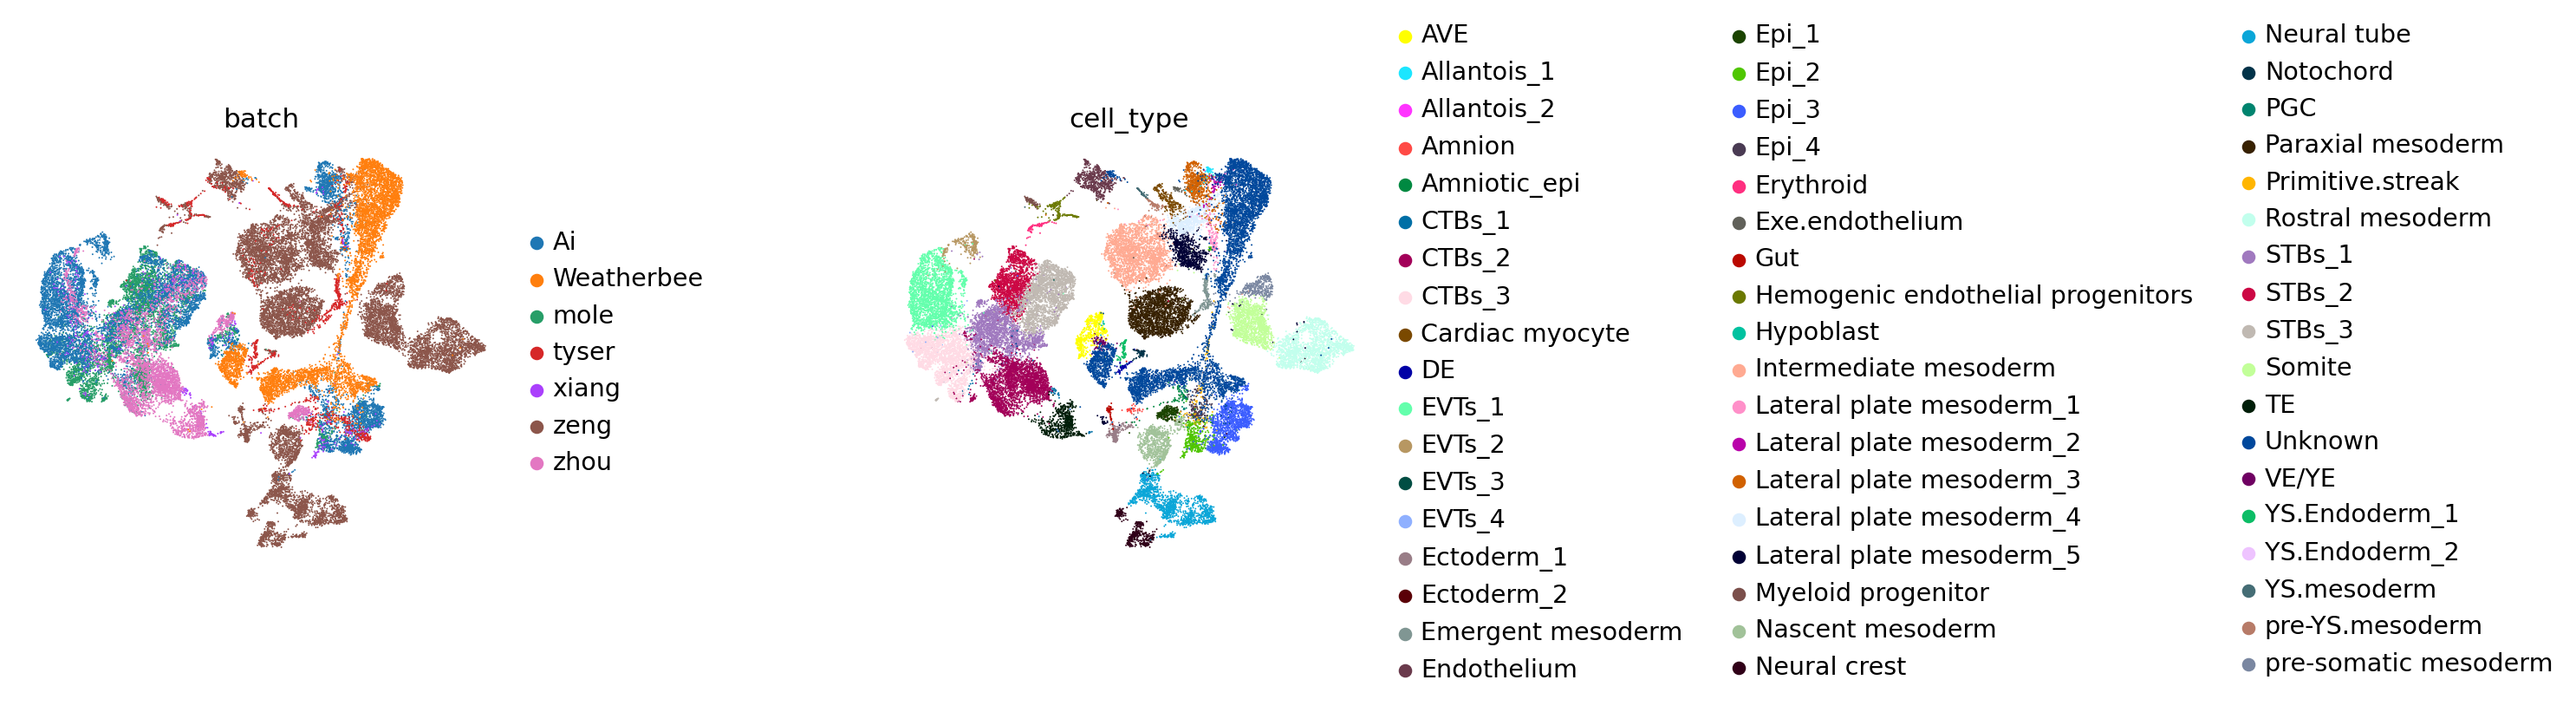

In [48]:
sc.pp.neighbors(full_latent)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
plt.figure()
sc.pl.umap(
    full_latent,
    color=["batch", "cell_type"],
    frameon=False,
    wspace=0.6,
)

In [49]:
full_latent.obs['predictions'] = model.predict(adata=adata_full)
print("Acc: {}".format(np.mean(full_latent.obs.predictions == full_latent.obs.cell_type)))

Acc: 0.8319128908336938


In [50]:
full_latent

AnnData object with n_obs × n_vars = 39307 × 10
    obs: 'cell_type', 'batch', 'leiden', 'predictions'
    uns: 'neighbors', 'leiden', 'umap', 'batch_colors', 'cell_type_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [51]:
full_latent.obs

cell_type       batch leiden               predictions
0        CTBs_3        mole      5                    CTBs_3
1        STBs_3        mole      9                    STBs_3
2        STBs_1        mole      8                    STBs_1
3        STBs_1        mole      8                    STBs_1
4           AVE        mole     12                       AVE
...         ...         ...    ...                       ...
39302   Unknown  Weatherbee     16                     Epi_3
39303   Unknown  Weatherbee     16                     Epi_3
39304   Unknown  Weatherbee     13                Ectoderm_1
39305   Unknown  Weatherbee     21  Lateral plate mesoderm_1
39306   Unknown  Weatherbee     16                     Epi_3

[39307 rows x 4 columns]

<Figure size 320x320 with 0 Axes>

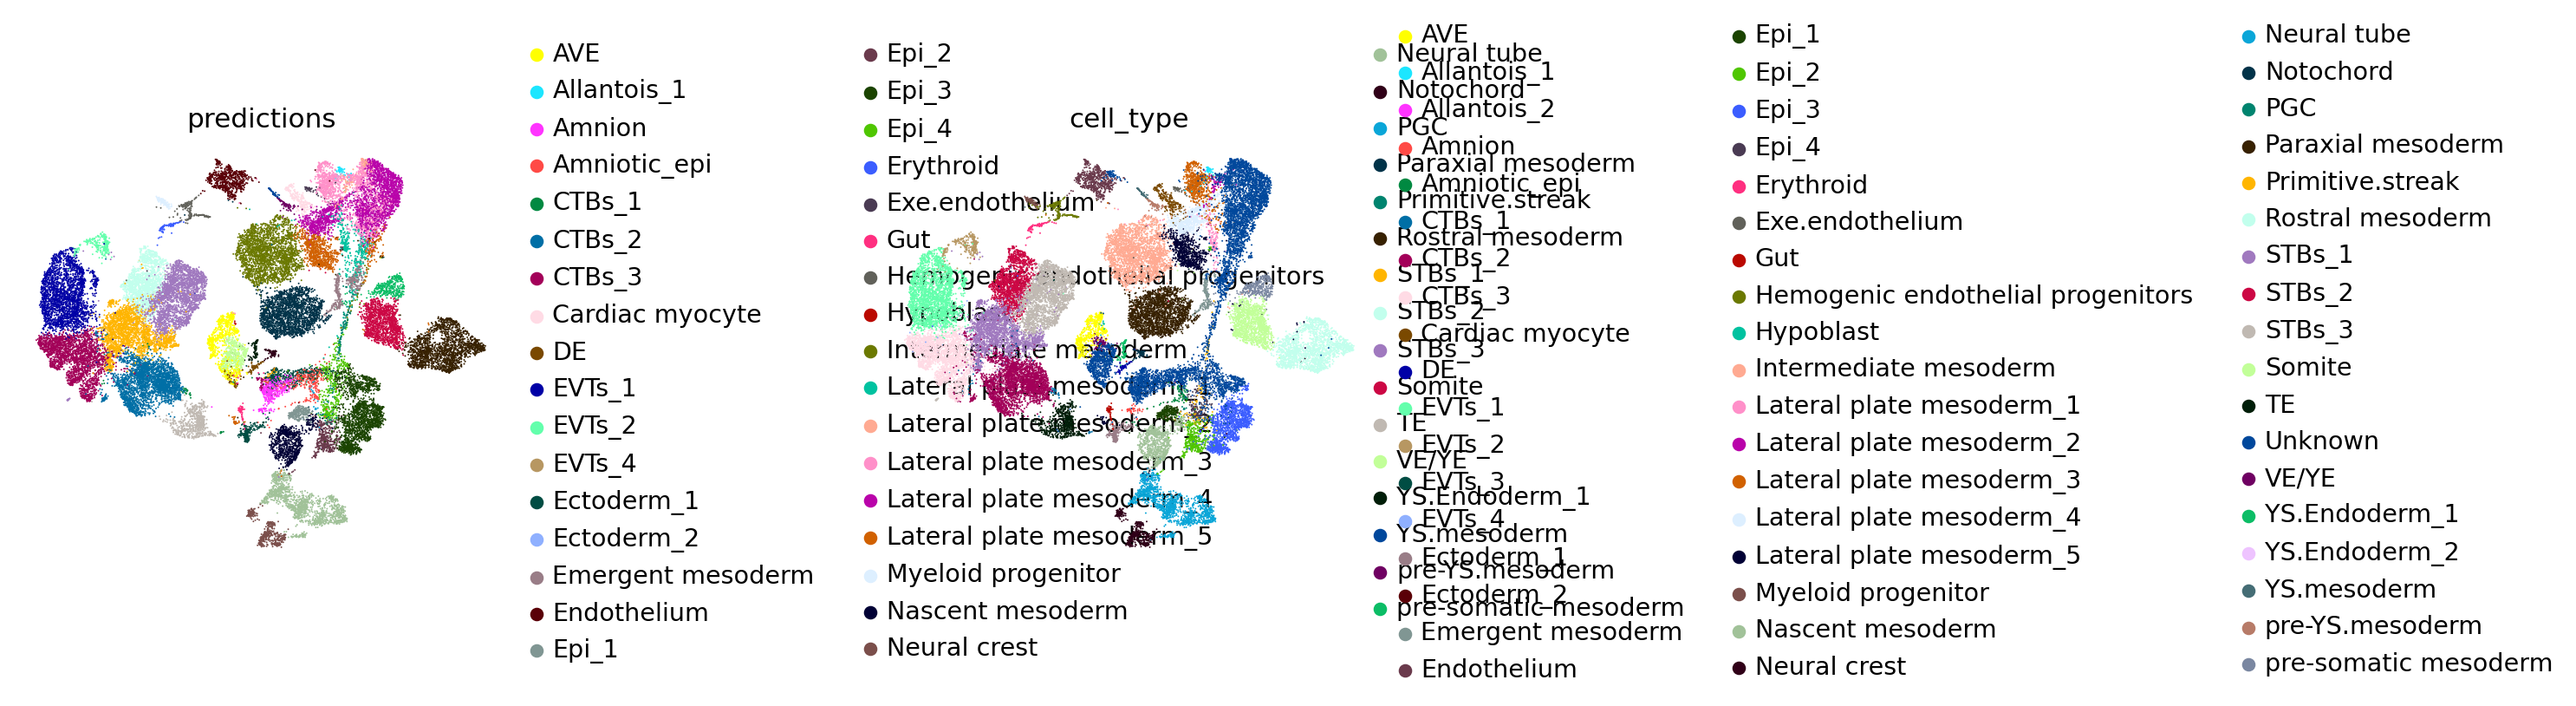

In [52]:
sc.pp.neighbors(full_latent)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
plt.figure()
sc.pl.umap(
    full_latent,
    color=["predictions", "cell_type"],
    frameon=False,
    wspace=0.6,
)

In [53]:
adata_full.obs["scArches_final_anno_pre"] = full_latent.obs["predictions"].values

In [54]:
adata_full.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0        mole    112028.0          9381   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0        mole    191885.0          8618   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0        mole    189565.0          7942   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0        mole     25545.0          4869   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0        mole    107601.0         10074   
...                                      ...         ...           ...   
TTTGAGTCATCCGTAA-1-1              Weatherbee     29746.0          6569   
TTTGGTAAGTTACTTC-1-1              Weatherbee     44527.0          8383   
TTTGTCTAGCATGAAG-1-1              Weatherbee      9015.0          3987   
TTTGTGAAGTTAACCA-1-1              Weatherbee     24582.0          6431   
TTTGTTGGTGCTCCGT-1-1              Weatherbee     21416.0          5934   

                                   sample   stage  percent.mt       species  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    5.228157  Homo sapiens   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Sample1  E9_IVC   14.688485  Homo sapiens   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    7.517738  Homo sapiens   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Sample1  E9_IVC   17.987865  Homo sapiens   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Sample1  E9_IVC    3.851265  Homo sapiens   
...                                   ...     ...         ...           ...   
TTTGAGTCATCCGTAA-1-1                  NaN      D4   10.925839  Homo sapiens   
TTTGGTAAGTTACTTC-1-1                  NaN      D4    8.978822  Homo sapiens   
TTTGTCTAGCATGAAG-1-1                  NaN      D4    3.982252  Homo sapiens   
TTTGTGAAGTTAACCA-1-1                  NaN      D4    4.653812  Homo sapiens   
TTTGTTGGTGCTCCGT-1-1                  NaN      D4   11.379343  Homo sapiens   

                                                embryo      platform  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
...                                                ...           ...   
TTTGAGTCATCCGTAA-1-1                      Embryo Model  10x-Genomics   
TTTGGTAAGTTACTTC-1-1                      Embryo Model  10x-Genomics   
TTTGTCTAGCATGAAG-1-1                      Embryo Model  10x-Genomics   
TTTGTGAAGTTAACCA-1-1                      Embryo Model  10x-Genomics   
TTTGTTGGTGCTCCGT-1-1                      Embryo Model  10x-Genomics   

                                 ann_level_2  ... scmap_nakamura  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0   Hypoblast  ...            NaN   
...                                      ...  ...            ...   
TTTGAGTCATCCGTAA-1-1                     NaN  ...      PostL-EPI   
TTTGGTAAGTTACTTC-1-1                     NaN  ...             NA   
TTTGTCTAGCATGAAG-1-1                     NaN  ...      PostL-EPI   
TTTGTGAAGTTAACCA-1-1                     NaN  ...           EXMC   
TTTGTTGGTGCTCCGT-1-1                     NaN  ...      PostL-EPI   

                                             scmapCELL_Yang   scmap_ma  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0                        NaN        NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0                        NaN        NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0                        NaN        NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0                        NaN        NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0                        NaN        NaN   
...                                                     ...        ...

In [55]:
Weatherbee_data = adata_full.obs[adata_full.obs["orig.ident"] == "Weatherbee"]

In [56]:
Weatherbee_data

orig.ident  nCount_RNA  nFeature_RNA sample stage  \
AAACAGCCAATATACC-1_1-1  Weatherbee      7994.0          3257    NaN    D8   
AAACAGCCACTAAGCC-1_1-1  Weatherbee      8411.0          3593    NaN    D8   
AAACATGCAGTATGTT-1_1-1  Weatherbee      7937.0          3497    NaN    D8   
AAACCAACAATAACCT-1_1-1  Weatherbee     10750.0          4132    NaN    D8   
AAACCGAAGGCTAGAA-1_1-1  Weatherbee     10730.0          4098    NaN    D8   
...                            ...         ...           ...    ...   ...   
TTTGAGTCATCCGTAA-1-1    Weatherbee     29746.0          6569    NaN    D4   
TTTGGTAAGTTACTTC-1-1    Weatherbee     44527.0          8383    NaN    D4   
TTTGTCTAGCATGAAG-1-1    Weatherbee      9015.0          3987    NaN    D4   
TTTGTGAAGTTAACCA-1-1    Weatherbee     24582.0          6431    NaN    D4   
TTTGTTGGTGCTCCGT-1-1    Weatherbee     21416.0          5934    NaN    D4   

                        percent.mt       species        embryo      platform  \
AAACAGCCAATATACC-1_1-1    4.953715  Homo sapiens  Embryo Model  10x-Genomics   
AAACAGCCACTAAGCC-1_1-1    4.541672  Homo sapiens  Embryo Model  10x-Genomics   
AAACATGCAGTATGTT-1_1-1    3.187602  Homo sapiens  Embryo Model  10x-Genomics   
AAACCAACAATAACCT-1_1-1    2.483721  Homo sapiens  Embryo Model  10x-Genomics   
AAACCGAAGGCTAGAA-1_1-1    3.122088  Homo sapiens  Embryo Model  10x-Genomics   
...                            ...           ...           ...           ...   
TTTGAGTCATCCGTAA-1-1     10.925839  Homo sapiens  Embryo Model  10x-Genomics   
TTTGGTAAGTTACTTC-1-1      8.978822  Homo sapiens  Embryo Model  10x-Genomics   
TTTGTCTAGCATGAAG-1-1      3.982252  Homo sapiens  Embryo Model  10x-Genomics   
TTTGTGAAGTTAACCA-1-1      4.653812  Homo sapiens  Embryo Model  10x-Genomics   
TTTGTTGGTGCTCCGT-1-1     11.379343  Homo sapiens  Embryo Model  10x-Genomics   

                       ann_level_2  ... scmap_nakamura  \
AAACAGCCAATATACC-1_1-1         NaN  ...      Post-paTE   
AAACAGCCACTAAGCC-1_1-1         NaN  ...      Post-paTE   
AAACATGCAGTATGTT-1_1-1         NaN  ...           EXMC   
AAACCAACAATAACCT-1_1-1         NaN  ...           EXMC   
AAACCGAAGGCTAGAA-1_1-1         NaN  ...           EXMC   
...                            ...  ...            ...   
TTTGAGTCATCCGTAA-1-1           NaN  ...      PostL-EPI   
TTTGGTAAGTTACTTC-1-1           NaN  ...             NA   
TTTGTCTAGCATGAAG-1-1           NaN  ...      PostL-EPI   
TTTGTGAAGTTAACCA-1-1           NaN  ...           EXMC   
TTTGTTGGTGCTCCGT-1-1           NaN  ...      PostL-EPI   

                                   scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1-1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1-1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1-1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1-1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1-1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                           ...        ...          ...   
TTTGAGTCATCCGTAA-1-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1-1                     epiblast      L-AM1     Epiblast   

                          scmapCELL_Mole  cell_assignment  \
AAACAGCCAATATACC-1_1-1         Hypoblast             AM-3   
AAACAGCCACTAAGCC-1_1-1  Cytotrophoblasts             AM-3   
AAACATGCAGTATGTT-1_1-1         Hypoblast             EXMC   
AAACCAACAATAACCT-1_1-1         Hypoblast             EXMC   
AAACCGAAGGCTAGAA-1_1-1         Hypoblast             EXMC   
...                                  ...              ...   
TTTGAGTCATCCGTAA-1-1            Epiblast            L-EPI   
TTTGGTAAGTTACTTC-1-1        

In [57]:
Weatherbee.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
AAACAGCCAATATACC-1_1  Weatherbee      7994.0          3257    4.953715   
AAACAGCCACTAAGCC-1_1  Weatherbee      8411.0          3593    4.541672   
AAACATGCAGTATGTT-1_1  Weatherbee      7937.0          3497    3.187602   
AAACCAACAATAACCT-1_1  Weatherbee     10750.0          4132    2.483721   
AAACCGAAGGCTAGAA-1_1  Weatherbee     10730.0          4098    3.122088   
...                          ...         ...           ...         ...   
TTTGAGTCATCCGTAA-1    Weatherbee     29746.0          6569   10.925839   
TTTGGTAAGTTACTTC-1    Weatherbee     44527.0          8383    8.978822   
TTTGTCTAGCATGAAG-1    Weatherbee      9015.0          3987    3.982252   
TTTGTGAAGTTAACCA-1    Weatherbee     24582.0          6431    4.653812   
TTTGTTGGTGCTCCGT-1    Weatherbee     21416.0          5934   11.379343   

                                sample_type scmap_nakamura  \
AAACAGCCAATATACC-1_1  double_structure_day8      Post-paTE   
AAACAGCCACTAAGCC-1_1  double_structure_day8      Post-paTE   
AAACATGCAGTATGTT-1_1  double_structure_day8           EXMC   
AAACCAACAATAACCT-1_1  double_structure_day8           EXMC   
AAACCGAAGGCTAGAA-1_1  double_structure_day8           EXMC   
...                                     ...            ...   
TTTGAGTCATCCGTAA-1    double_structure_day4      PostL-EPI   
TTTGGTAAGTTACTTC-1                       NA             NA   
TTTGTCTAGCATGAAG-1    double_structure_day4      PostL-EPI   
TTTGTGAAGTTAACCA-1    double_structure_day4           EXMC   
TTTGTTGGTGCTCCGT-1    double_structure_day4      PostL-EPI   

                                 scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                         ...        ...          ...   
TTTGAGTCATCCGTAA-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1                     epiblast      L-AM1     Epiblast   

                        scmapCELL_Mole cell_assignment course_cell_assignment  \
AAACAGCCAATATACC-1_1         Hypoblast            AM-3                    AME   
AAACAGCCACTAAGCC-1_1  Cytotrophoblasts            AM-3                    AME   
AAACATGCAGTATGTT-1_1         Hypoblast            EXMC                   EXMC   
AAACCAACAATAACCT-1_1         Hypoblast            EXMC                   EXMC   
AAACCGAAGGCTAGAA-1_1         Hypoblast            EXMC                   EXMC   
...                                ...             ...                    ...   
TTTGAGTCATCCGTAA-1            Epiblast           L-EPI                  L-EPI   
TTTGGTAAGTTACTTC-1                  NA              NA                     NA   
TTTGTCTAGCATGAAG-1          unassigned            AM-1                    AME   
TTTGTGAAGTTAACCA-1          unassigned          MESO-2                   Meso   
TTTGTTGGTGCTCCGT-1            Epiblast            AM-2                    AME   

                     stage       species        embryo      platform  doublet  \
AAACAGCCAATATACC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACAGCCACTAAGCC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACATGCAGTATGTT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCAACAATAACCT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCGAAGGCTAGAA-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
...                    ...  

In [58]:
Weatherbee.obs["scArches_final_anno_pre"] = Weatherbee_data["scArches_final_anno_pre"].values

In [59]:
Weatherbee.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
AAACAGCCAATATACC-1_1  Weatherbee      7994.0          3257    4.953715   
AAACAGCCACTAAGCC-1_1  Weatherbee      8411.0          3593    4.541672   
AAACATGCAGTATGTT-1_1  Weatherbee      7937.0          3497    3.187602   
AAACCAACAATAACCT-1_1  Weatherbee     10750.0          4132    2.483721   
AAACCGAAGGCTAGAA-1_1  Weatherbee     10730.0          4098    3.122088   
...                          ...         ...           ...         ...   
TTTGAGTCATCCGTAA-1    Weatherbee     29746.0          6569   10.925839   
TTTGGTAAGTTACTTC-1    Weatherbee     44527.0          8383    8.978822   
TTTGTCTAGCATGAAG-1    Weatherbee      9015.0          3987    3.982252   
TTTGTGAAGTTAACCA-1    Weatherbee     24582.0          6431    4.653812   
TTTGTTGGTGCTCCGT-1    Weatherbee     21416.0          5934   11.379343   

                                sample_type scmap_nakamura  \
AAACAGCCAATATACC-1_1  double_structure_day8      Post-paTE   
AAACAGCCACTAAGCC-1_1  double_structure_day8      Post-paTE   
AAACATGCAGTATGTT-1_1  double_structure_day8           EXMC   
AAACCAACAATAACCT-1_1  double_structure_day8           EXMC   
AAACCGAAGGCTAGAA-1_1  double_structure_day8           EXMC   
...                                     ...            ...   
TTTGAGTCATCCGTAA-1    double_structure_day4      PostL-EPI   
TTTGGTAAGTTACTTC-1                       NA             NA   
TTTGTCTAGCATGAAG-1    double_structure_day4      PostL-EPI   
TTTGTGAAGTTAACCA-1    double_structure_day4           EXMC   
TTTGTTGGTGCTCCGT-1    double_structure_day4      PostL-EPI   

                                 scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                         ...        ...          ...   
TTTGAGTCATCCGTAA-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1                     epiblast      L-AM1     Epiblast   

                        scmapCELL_Mole cell_assignment course_cell_assignment  \
AAACAGCCAATATACC-1_1         Hypoblast            AM-3                    AME   
AAACAGCCACTAAGCC-1_1  Cytotrophoblasts            AM-3                    AME   
AAACATGCAGTATGTT-1_1         Hypoblast            EXMC                   EXMC   
AAACCAACAATAACCT-1_1         Hypoblast            EXMC                   EXMC   
AAACCGAAGGCTAGAA-1_1         Hypoblast            EXMC                   EXMC   
...                                ...             ...                    ...   
TTTGAGTCATCCGTAA-1            Epiblast           L-EPI                  L-EPI   
TTTGGTAAGTTACTTC-1                  NA              NA                     NA   
TTTGTCTAGCATGAAG-1          unassigned            AM-1                    AME   
TTTGTGAAGTTAACCA-1          unassigned          MESO-2                   Meso   
TTTGTTGGTGCTCCGT-1            Epiblast            AM-2                    AME   

                     stage       species        embryo      platform  doublet  \
AAACAGCCAATATACC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACAGCCACTAAGCC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACATGCAGTATGTT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCAACAATAACCT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCGAAGGCTAGAA-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
...                    ...  

# final_lineage

In [60]:
condition_key = 'orig.ident'
cell_type_key = "final_lineage"

In [61]:
source_adata=original_source_adata.copy()
target_adata=original_target_adata.copy()

In [62]:
sca.models.SCVI.setup_anndata(source_adata, batch_key=condition_key, labels_key=cell_type_key)
vae = sca.models.SCVI(
    source_adata,
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)
vae.train()

INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_

Epoch 239/239: 100%|██████████| 239/239 [15:19<00:00,  3.84s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.19e+3]

INFO: `Trainer.fit` stopped: `max_epochs=239` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=239` reached.


Epoch 239/239: 100%|██████████| 239/239 [15:19<00:00,  3.85s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.19e+3]


In [63]:
scanvae = sca.models.SCANVI.from_scvi_model(vae, unlabeled_category = "Unknown")
print("Labelled Indices: ", len(scanvae._labeled_indices))
print("Unlabelled Indices: ", len(scanvae._unlabeled_indices))

Labelled Indices:  33406
Unlabelled Indices:  0


In [64]:
scanvae.train(max_epochs=20)
reference_latent = sc.AnnData(scanvae.get_latent_representation())
reference_latent.obs["cell_type"] = source_adata.obs[cell_type_key].tolist()
reference_latent.obs["batch"] = source_adata.obs[condition_key].tolist()

INFO     Training for 20 epochs.                                                                                   


INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_

Epoch 20/20: 100%|██████████| 20/20 [02:54<00:00,  8.72s/it, v_num=1, train_loss_step=1.18e+3, train_loss_epoch=1.18e+3]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [02:54<00:00,  8.70s/it, v_num=1, train_loss_step=1.18e+3, train_loss_epoch=1.18e+3]


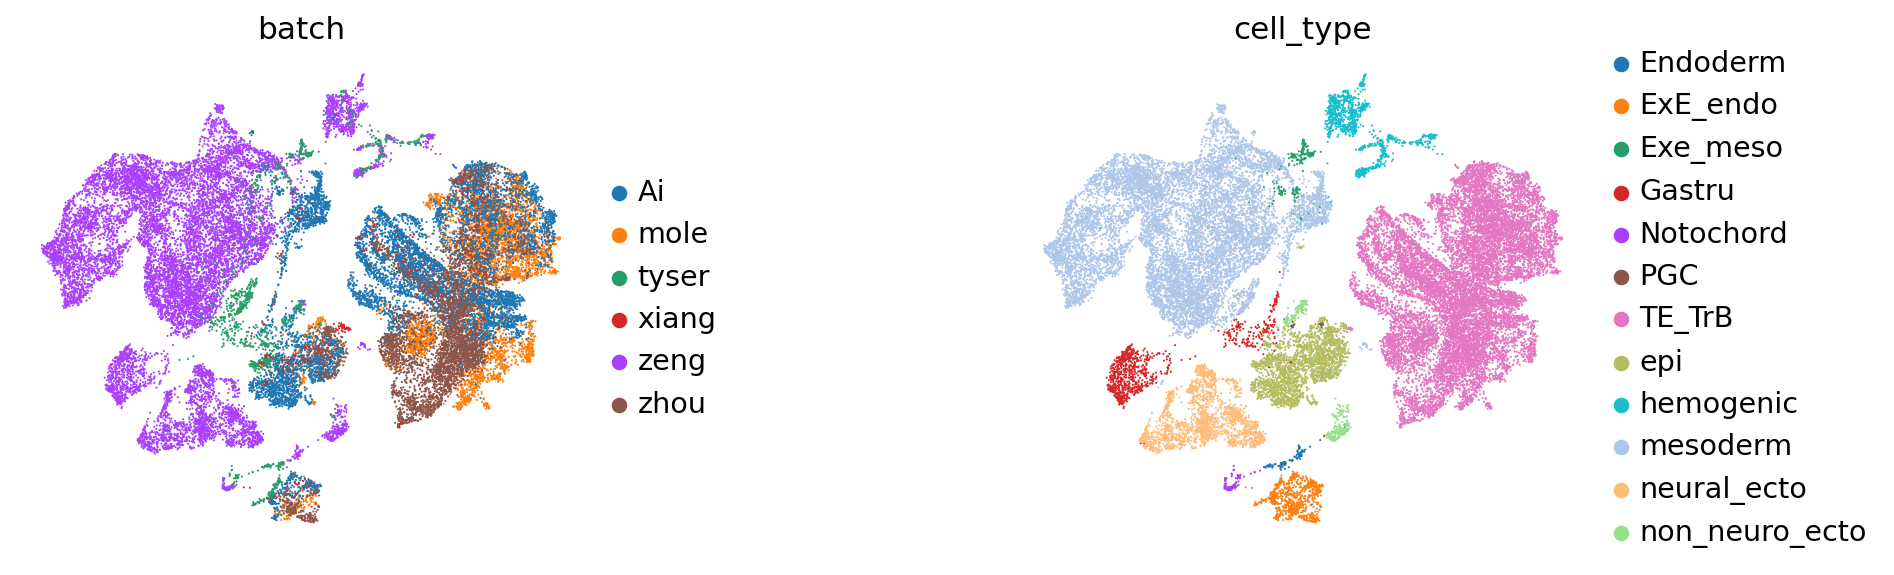

In [65]:
sc.pp.neighbors(reference_latent, n_neighbors=10)
sc.tl.leiden(reference_latent)
sc.tl.umap(reference_latent)
sc.pl.umap(reference_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,)

In [66]:
reference_latent.obs['predictions'] = scanvae.predict()
reference_latent.obs

cell_type batch leiden predictions
0        TE_TrB  mole      3      TE_TrB
1        TE_TrB  mole      4      TE_TrB
2        TE_TrB  mole      4      TE_TrB
3        TE_TrB  mole      4      TE_TrB
4      ExE_endo  mole     18    ExE_endo
...         ...   ...    ...         ...
33401    TE_TrB  zhou     14      TE_TrB
33402    TE_TrB  zhou      6      TE_TrB
33403    TE_TrB  zhou      6      TE_TrB
33404    TE_TrB  zhou      6      TE_TrB
33405    TE_TrB  zhou      6      TE_TrB

[33406 rows x 4 columns]

In [67]:
ref_path = '/data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_lineage_model'
scanvae.save(ref_path, overwrite=True)

In [68]:
target_adata

AnnData object with n_obs × n_vars = 5901 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'stage', 'species', 'embryo', 'platform'
    var: 'features'
    layers: 'counts'

In [69]:
target_adata.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
AAACAGCCAATATACC-1_1  Weatherbee      7994.0          3257    4.953715   
AAACAGCCACTAAGCC-1_1  Weatherbee      8411.0          3593    4.541672   
AAACATGCAGTATGTT-1_1  Weatherbee      7937.0          3497    3.187602   
AAACCAACAATAACCT-1_1  Weatherbee     10750.0          4132    2.483721   
AAACCGAAGGCTAGAA-1_1  Weatherbee     10730.0          4098    3.122088   
...                          ...         ...           ...         ...   
TTTGAGTCATCCGTAA-1    Weatherbee     29746.0          6569   10.925839   
TTTGGTAAGTTACTTC-1    Weatherbee     44527.0          8383    8.978822   
TTTGTCTAGCATGAAG-1    Weatherbee      9015.0          3987    3.982252   
TTTGTGAAGTTAACCA-1    Weatherbee     24582.0          6431    4.653812   
TTTGTTGGTGCTCCGT-1    Weatherbee     21416.0          5934   11.379343   

                                sample_type scmap_nakamura  \
AAACAGCCAATATACC-1_1  double_structure_day8      Post-paTE   
AAACAGCCACTAAGCC-1_1  double_structure_day8      Post-paTE   
AAACATGCAGTATGTT-1_1  double_structure_day8           EXMC   
AAACCAACAATAACCT-1_1  double_structure_day8           EXMC   
AAACCGAAGGCTAGAA-1_1  double_structure_day8           EXMC   
...                                     ...            ...   
TTTGAGTCATCCGTAA-1    double_structure_day4      PostL-EPI   
TTTGGTAAGTTACTTC-1                       NA             NA   
TTTGTCTAGCATGAAG-1    double_structure_day4      PostL-EPI   
TTTGTGAAGTTAACCA-1    double_structure_day4           EXMC   
TTTGTTGGTGCTCCGT-1    double_structure_day4      PostL-EPI   

                                 scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                         ...        ...          ...   
TTTGAGTCATCCGTAA-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1                     epiblast      L-AM1     Epiblast   

                        scmapCELL_Mole cell_assignment course_cell_assignment  \
AAACAGCCAATATACC-1_1         Hypoblast            AM-3                    AME   
AAACAGCCACTAAGCC-1_1  Cytotrophoblasts            AM-3                    AME   
AAACATGCAGTATGTT-1_1         Hypoblast            EXMC                   EXMC   
AAACCAACAATAACCT-1_1         Hypoblast            EXMC                   EXMC   
AAACCGAAGGCTAGAA-1_1         Hypoblast            EXMC                   EXMC   
...                                ...             ...                    ...   
TTTGAGTCATCCGTAA-1            Epiblast           L-EPI                  L-EPI   
TTTGGTAAGTTACTTC-1                  NA              NA                     NA   
TTTGTCTAGCATGAAG-1          unassigned            AM-1                    AME   
TTTGTGAAGTTAACCA-1          unassigned          MESO-2                   Meso   
TTTGTTGGTGCTCCGT-1            Epiblast            AM-2                    AME   

                     stage       species        embryo      platform  
AAACAGCCAATATACC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACAGCCACTAAGCC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACATGCAGTATGTT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACCAACAATAACCT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
AAACCGAAGGCTAGAA-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics  
...                    ...           ...           ...           ...  
TTTGAGTCATCCGTAA-

In [70]:
model = sca.models.SCANVI.load_query_data(
    target_adata,
    ref_path,
    freeze_dropout = True,
)

INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File                                                                                                      
         /data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_lineage_model/model.pt    
         already downloaded                                                                                        


/home/lanxiang/miniconda3/lib/python3.12/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_locatio

In [71]:
model._unlabeled_indices = np.arange(target_adata.n_obs)
model._labeled_indices = []
print("Labelled Indices: ", len(model._labeled_indices))
print("Unlabelled Indices: ", len(model._unlabeled_indices))

Labelled Indices:  0
Unlabelled Indices:  5901


In [72]:
model.train(
    max_epochs=100,
    plan_kwargs=dict(weight_decay=0.0),
    check_val_every_n_epoch=10,
)

INFO     Training for 100 epochs.                                                                                  


INFO: Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_

Epoch 11/100:  10%|█         | 10/100 [00:11<01:44,  1.17s/it, v_num=1, train_loss_step=1.54e+3, train_loss_epoch=1.56e+3]

/home/lanxiang/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=79` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [02:00<00:00,  1.22s/it, v_num=1, train_loss_step=1.59e+3, train_loss_epoch=1.54e+3]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [02:00<00:00,  1.21s/it, v_num=1, train_loss_step=1.59e+3, train_loss_epoch=1.54e+3]


In [73]:
query_latent = sc.AnnData(model.get_latent_representation())
query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

In [74]:
sc.pp.neighbors(query_latent)
sc.tl.leiden(query_latent)
sc.tl.umap(query_latent)

In [75]:
surg_path = '/data2/lanxiang/embryo_benchmark/25.1.13_update/scArches/human_Weatherbee/final_lineage_surg_model'
model.save(surg_path, overwrite=True)

In [76]:
query_latent.obs['predictions'] = model.predict()

In [77]:
adata_full = source_adata.concatenate(target_adata)
adata_full.obs["is_ref"] = ["Query"] * len(target_adata) + ["Reference"] * len(
    source_adata
)

/tmp/ipykernel_4077059/2722538653.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_full = source_adata.concatenate(target_adata)


In [78]:
adata_full

AnnData object with n_obs × n_vars = 39307 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'stage', 'percent.mt', 'species', 'embryo', 'platform', 'ann_level_2', 'ann_level_3', 'ann_level_1', 'final_anno', 'final_lineage', '_scvi_batch', '_scvi_labels', 'sample_type', 'scmap_nakamura', 'scmapCELL_Yang', 'scmap_ma', 'scmap_Tyser', 'scmapCELL_Mole', 'cell_assignment', 'course_cell_assignment', 'batch', 'is_ref'
    var: 'features-0', 'features-1'
    layers: 'counts'

In [79]:
adata_full.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0        mole    112028.0          9381   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0        mole    191885.0          8618   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0        mole    189565.0          7942   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0        mole     25545.0          4869   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0        mole    107601.0         10074   
...                                      ...         ...           ...   
TTTGAGTCATCCGTAA-1-1              Weatherbee     29746.0          6569   
TTTGGTAAGTTACTTC-1-1              Weatherbee     44527.0          8383   
TTTGTCTAGCATGAAG-1-1              Weatherbee      9015.0          3987   
TTTGTGAAGTTAACCA-1-1              Weatherbee     24582.0          6431   
TTTGTTGGTGCTCCGT-1-1              Weatherbee     21416.0          5934   

                                   sample   stage  percent.mt       species  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    5.228157  Homo sapiens   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Sample1  E9_IVC   14.688485  Homo sapiens   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    7.517738  Homo sapiens   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Sample1  E9_IVC   17.987865  Homo sapiens   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Sample1  E9_IVC    3.851265  Homo sapiens   
...                                   ...     ...         ...           ...   
TTTGAGTCATCCGTAA-1-1                  NaN      D4   10.925839  Homo sapiens   
TTTGGTAAGTTACTTC-1-1                  NaN      D4    8.978822  Homo sapiens   
TTTGTCTAGCATGAAG-1-1                  NaN      D4    3.982252  Homo sapiens   
TTTGTGAAGTTAACCA-1-1                  NaN      D4    4.653812  Homo sapiens   
TTTGTTGGTGCTCCGT-1-1                  NaN      D4   11.379343  Homo sapiens   

                                                embryo      platform  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
...                                                ...           ...   
TTTGAGTCATCCGTAA-1-1                      Embryo Model  10x-Genomics   
TTTGGTAAGTTACTTC-1-1                      Embryo Model  10x-Genomics   
TTTGTCTAGCATGAAG-1-1                      Embryo Model  10x-Genomics   
TTTGTGAAGTTAACCA-1-1                      Embryo Model  10x-Genomics   
TTTGTTGGTGCTCCGT-1-1                      Embryo Model  10x-Genomics   

                                 ann_level_2  ...            sample_type  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  TE_CTB_STB  ...                    NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0   Hypoblast  ...                    NaN   
...                                      ...  ...                    ...   
TTTGAGTCATCCGTAA-1-1                     NaN  ...  double_structure_day4   
TTTGGTAAGTTACTTC-1-1                     NaN  ...                     NA   
TTTGTCTAGCATGAAG-1-1                     NaN  ...  double_structure_day4   
TTTGTGAAGTTAACCA-1-1                     NaN  ...  double_structure_day4   
TTTGTTGGTGCTCCGT-1-1                     NaN  ...  double_structure_day4   

                                 scmap_nakamura             scmapCELL_Yang  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0            NaN                        NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0            NaN                        NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0            NaN                        NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0            NaN                        NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1

In [80]:
full_latent = sc.AnnData(model.get_latent_representation(adata=adata_full))
full_latent.obs['cell_type'] = adata_full.obs[cell_type_key].tolist()
full_latent.obs['batch'] = adata_full.obs[condition_key].tolist()

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


<Figure size 320x320 with 0 Axes>

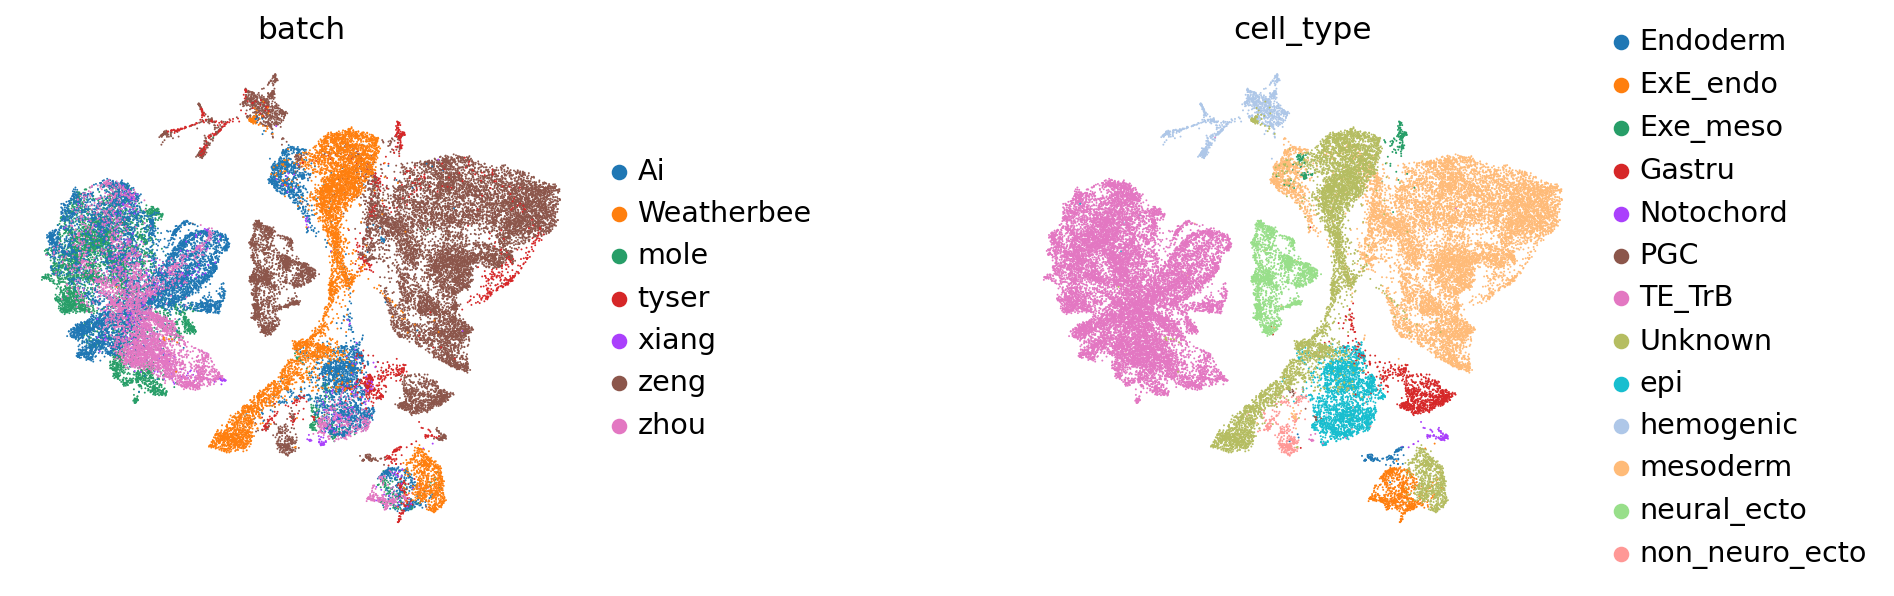

In [81]:
sc.pp.neighbors(full_latent)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
plt.figure()
sc.pl.umap(
    full_latent,
    color=["batch", "cell_type"],
    frameon=False,
    wspace=0.6,
)

In [82]:
full_latent.obs['predictions'] = model.predict(adata=adata_full)
print("Acc: {}".format(np.mean(full_latent.obs.predictions == full_latent.obs.cell_type)))

Acc: 0.8482967410384918


In [83]:
full_latent

AnnData object with n_obs × n_vars = 39307 × 10
    obs: 'cell_type', 'batch', 'leiden', 'predictions'
    uns: 'neighbors', 'leiden', 'umap', 'batch_colors', 'cell_type_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [84]:
full_latent.obs

cell_type       batch leiden predictions
0        TE_TrB        mole     11      TE_TrB
1        TE_TrB        mole      7      TE_TrB
2        TE_TrB        mole     14      TE_TrB
3        TE_TrB        mole     14      TE_TrB
4      ExE_endo        mole     12    ExE_endo
...         ...         ...    ...         ...
39302   Unknown  Weatherbee     16         epi
39303   Unknown  Weatherbee     16         epi
39304   Unknown  Weatherbee     19         epi
39305   Unknown  Weatherbee     20    mesoderm
39306   Unknown  Weatherbee     19         epi

[39307 rows x 4 columns]

<Figure size 320x320 with 0 Axes>

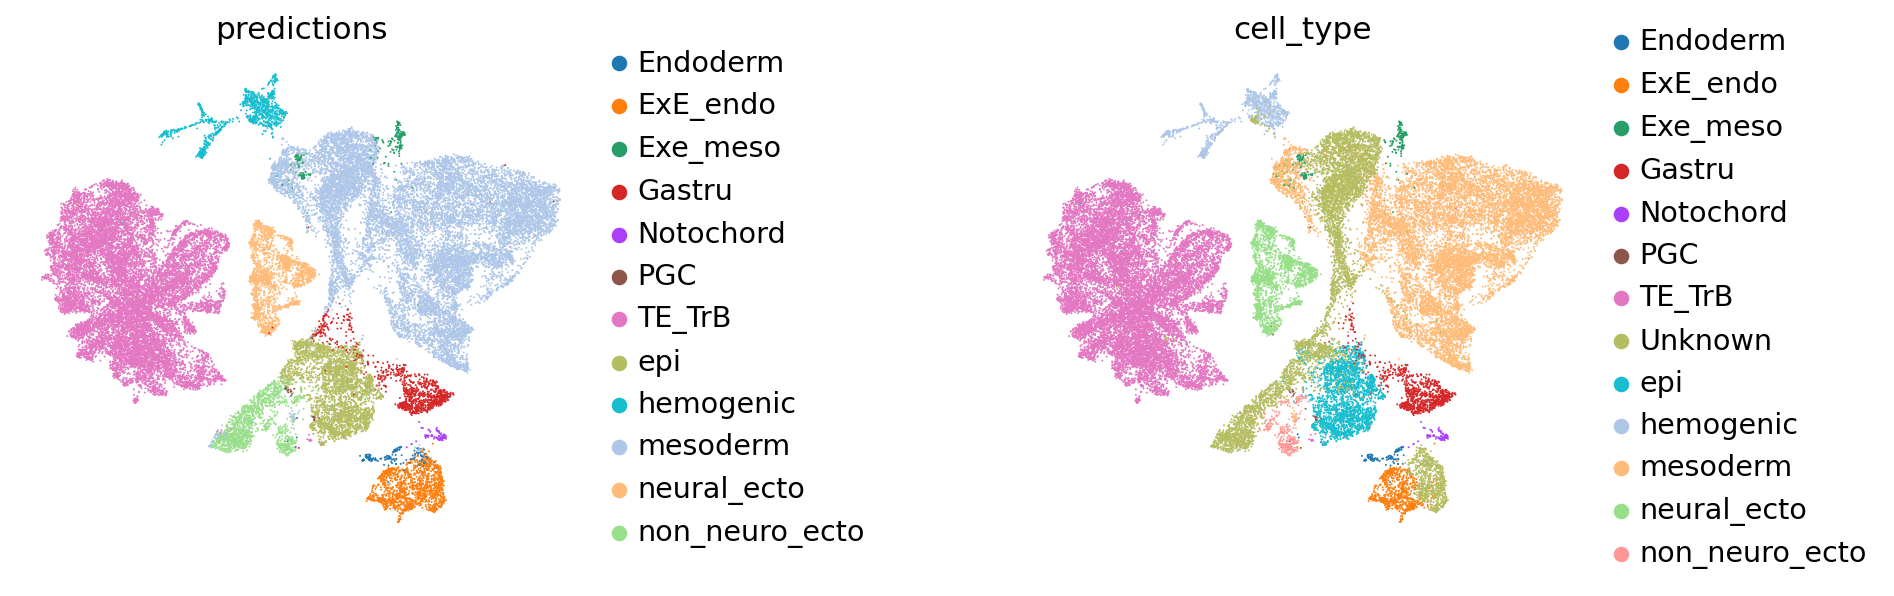

In [85]:
sc.pp.neighbors(full_latent)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
plt.figure()
sc.pl.umap(
    full_latent,
    color=["predictions", "cell_type"],
    frameon=False,
    wspace=0.6,
)

In [86]:
adata_full.obs["scArches_final_lineage_pre"] = full_latent.obs["predictions"].values

In [87]:
adata_full.obs

orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0        mole    112028.0          9381   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0        mole    191885.0          8618   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0        mole    189565.0          7942   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0        mole     25545.0          4869   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0        mole    107601.0         10074   
...                                      ...         ...           ...   
TTTGAGTCATCCGTAA-1-1              Weatherbee     29746.0          6569   
TTTGGTAAGTTACTTC-1-1              Weatherbee     44527.0          8383   
TTTGTCTAGCATGAAG-1-1              Weatherbee      9015.0          3987   
TTTGTGAAGTTAACCA-1-1              Weatherbee     24582.0          6431   
TTTGTTGGTGCTCCGT-1-1              Weatherbee     21416.0          5934   

                                   sample   stage  percent.mt       species  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    5.228157  Homo sapiens   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Sample1  E9_IVC   14.688485  Homo sapiens   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Sample1  E9_IVC    7.517738  Homo sapiens   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Sample1  E9_IVC   17.987865  Homo sapiens   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Sample1  E9_IVC    3.851265  Homo sapiens   
...                                   ...     ...         ...           ...   
TTTGAGTCATCCGTAA-1-1                  NaN      D4   10.925839  Homo sapiens   
TTTGGTAAGTTACTTC-1-1                  NaN      D4    8.978822  Homo sapiens   
TTTGTCTAGCATGAAG-1-1                  NaN      D4    3.982252  Homo sapiens   
TTTGTGAAGTTAACCA-1-1                  NaN      D4    4.653812  Homo sapiens   
TTTGTTGGTGCTCCGT-1-1                  NaN      D4   11.379343  Homo sapiens   

                                                embryo      platform  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0  Real Embryo in vitro  10x-Genomics   
...                                                ...           ...   
TTTGAGTCATCCGTAA-1-1                      Embryo Model  10x-Genomics   
TTTGGTAAGTTACTTC-1-1                      Embryo Model  10x-Genomics   
TTTGTCTAGCATGAAG-1-1                      Embryo Model  10x-Genomics   
TTTGTGAAGTTAACCA-1-1                      Embryo Model  10x-Genomics   
TTTGTTGGTGCTCCGT-1-1                      Embryo Model  10x-Genomics   

                                 ann_level_2  ... scmap_nakamura  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0  TE_CTB_STB  ...            NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0   Hypoblast  ...            NaN   
...                                      ...  ...            ...   
TTTGAGTCATCCGTAA-1-1                     NaN  ...      PostL-EPI   
TTTGGTAAGTTACTTC-1-1                     NaN  ...             NA   
TTTGTCTAGCATGAAG-1-1                     NaN  ...      PostL-EPI   
TTTGTGAAGTTAACCA-1-1                     NaN  ...           EXMC   
TTTGTTGGTGCTCCGT-1-1                     NaN  ...      PostL-EPI   

                                             scmapCELL_Yang   scmap_ma  \
AAACCTGAGACGCTTT-1_1_1_1_1_1_1-0                        NaN        NaN   
AACGTTGAGACGCAAC-1_1_1_1_1_1_1-0                        NaN        NaN   
AACTCAGCAGACGCCT-1_1_1_1_1_1_1-0                        NaN        NaN   
AAGACCTTCGGCGCTA-1_1_1_1_1_1_1-0                        NaN        NaN   
AAGCCGCCATATGGTC-1_1_1_1_1_1_1-0                        NaN        NaN   
...                                                     ...        ...

In [88]:
Weatherbee_data = adata_full.obs[adata_full.obs["orig.ident"] == "Weatherbee"]

In [89]:
Weatherbee.obs["scArches_final_lineage_pre"] = Weatherbee_data["scArches_final_lineage_pre"].values

In [90]:
Weatherbee.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
AAACAGCCAATATACC-1_1  Weatherbee      7994.0          3257    4.953715   
AAACAGCCACTAAGCC-1_1  Weatherbee      8411.0          3593    4.541672   
AAACATGCAGTATGTT-1_1  Weatherbee      7937.0          3497    3.187602   
AAACCAACAATAACCT-1_1  Weatherbee     10750.0          4132    2.483721   
AAACCGAAGGCTAGAA-1_1  Weatherbee     10730.0          4098    3.122088   
...                          ...         ...           ...         ...   
TTTGAGTCATCCGTAA-1    Weatherbee     29746.0          6569   10.925839   
TTTGGTAAGTTACTTC-1    Weatherbee     44527.0          8383    8.978822   
TTTGTCTAGCATGAAG-1    Weatherbee      9015.0          3987    3.982252   
TTTGTGAAGTTAACCA-1    Weatherbee     24582.0          6431    4.653812   
TTTGTTGGTGCTCCGT-1    Weatherbee     21416.0          5934   11.379343   

                                sample_type scmap_nakamura  \
AAACAGCCAATATACC-1_1  double_structure_day8      Post-paTE   
AAACAGCCACTAAGCC-1_1  double_structure_day8      Post-paTE   
AAACATGCAGTATGTT-1_1  double_structure_day8           EXMC   
AAACCAACAATAACCT-1_1  double_structure_day8           EXMC   
AAACCGAAGGCTAGAA-1_1  double_structure_day8           EXMC   
...                                     ...            ...   
TTTGAGTCATCCGTAA-1    double_structure_day4      PostL-EPI   
TTTGGTAAGTTACTTC-1                       NA             NA   
TTTGTCTAGCATGAAG-1    double_structure_day4      PostL-EPI   
TTTGTGAAGTTAACCA-1    double_structure_day4           EXMC   
TTTGTTGGTGCTCCGT-1    double_structure_day4      PostL-EPI   

                                 scmapCELL_Yang   scmap_ma  scmap_Tyser  \
AAACAGCCAATATACC-1_1                 unassigned      L-AM2       Amnion   
AAACAGCCACTAAGCC-1_1                 unassigned      L-AM2       Amnion   
AAACATGCAGTATGTT-1_1  extraembryonic mesenchyme       EXMC   unassigned   
AAACCAACAATAACCT-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
AAACCGAAGGCTAGAA-1_1  extraembryonic mesenchyme       EXMC  YS Mesoderm   
...                                         ...        ...          ...   
TTTGAGTCATCCGTAA-1                   unassigned  postL-EPI     Epiblast   
TTTGGTAAGTTACTTC-1                           NA         NA           NA   
TTTGTCTAGCATGAAG-1                   unassigned      L-AM1     Epiblast   
TTTGTGAAGTTAACCA-1    extraembryonic mesenchyme    L-Gast2   unassigned   
TTTGTTGGTGCTCCGT-1                     epiblast      L-AM1     Epiblast   

                        scmapCELL_Mole cell_assignment course_cell_assignment  \
AAACAGCCAATATACC-1_1         Hypoblast            AM-3                    AME   
AAACAGCCACTAAGCC-1_1  Cytotrophoblasts            AM-3                    AME   
AAACATGCAGTATGTT-1_1         Hypoblast            EXMC                   EXMC   
AAACCAACAATAACCT-1_1         Hypoblast            EXMC                   EXMC   
AAACCGAAGGCTAGAA-1_1         Hypoblast            EXMC                   EXMC   
...                                ...             ...                    ...   
TTTGAGTCATCCGTAA-1            Epiblast           L-EPI                  L-EPI   
TTTGGTAAGTTACTTC-1                  NA              NA                     NA   
TTTGTCTAGCATGAAG-1          unassigned            AM-1                    AME   
TTTGTGAAGTTAACCA-1          unassigned          MESO-2                   Meso   
TTTGTTGGTGCTCCGT-1            Epiblast            AM-2                    AME   

                     stage       species        embryo      platform  doublet  \
AAACAGCCAATATACC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACAGCCACTAAGCC-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACATGCAGTATGTT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCAACAATAACCT-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
AAACCGAAGGCTAGAA-1_1    D8  Homo sapiens  Embryo Model  10x-Genomics      0.0   
...                    ...  

In [91]:
Weatherbee.obs.to_csv("/data2/lanxiang/embryo_benchmark/25.1.13_update/human_Weatherbee_scArches.csv", index=True)

In [92]:
Weatherbee.write_h5ad("/data2/lanxiang/embryo_benchmark/25.1.13_update/human_Weatherbee_scArches.h5ad")